# Explore

We will now explore the European matches dataset we had cleaned.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
european_matches = pd.read_csv('../data/cleaned/european_matches.csv')

In [3]:
european_matches.head()

,date,home_win,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,...,wins_past_1_games,not_enough_past_games_1,wins_past_2_games,not_enough_past_games_2,wins_past_3_games,not_enough_past_games_3,wins_past_4_games,not_enough_past_games_4,wins_past_5_games,not_enough_past_games_5
0,2008-08-17 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
1,2008-08-16 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
2,2008-08-16 00:00:00,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
3,2008-08-17 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1
4,2008-08-16 00:00:00,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,1,0,1,0,1


We see that there is a lot of matches where we do not have much information about the players. We do not want the rows with too many missing values. We drop the rows that have fewer than 11 non-NA values. 

In [4]:
#See what columns do we have for players. 
player_columns = [column.split('11')[-1] for column in european_matches.columns if "home_player_11" in column]
player_columns

['_overall_rating',
 '_potential',
 '_preferred_foot',
 '_attacking_work_rate',
 '_defensive_work_rate',
 '_crossing',
 '_finishing',
 '_heading_accuracy',
 '_short_passing',
 '_volleys',
 '_dribbling',
 '_curve',
 '_free_kick_accuracy',
 '_long_passing',
 '_ball_control',
 '_acceleration',
 '_sprint_speed',
 '_agility',
 '_reactions',
 '_balance',
 '_shot_power',
 '_jumping',
 '_stamina',
 '_strength',
 '_long_shots',
 '_aggression',
 '_interceptions',
 '_positioning',
 '_vision',
 '_penalties',
 '_marking',
 '_standing_tackle',
 '_sliding_tackle',
 '_gk_diving',
 '_gk_handling',
 '_gk_kicking',
 '_gk_positioning',
 '_gk_reflexes']

In [5]:
def drop_columns_below_threshold(df, na_columns, threshold):
    """
    Drop rows with too many NAs in specified columns. threshold is min number of columns we want to have non-NA values.
    """
    df = df.copy()
    #Keep rows with number of non-NA values above threshold in specified columns
    keep_indices = df[na_columns].dropna(thresh = threshold).index
    return df.loc[keep_indices]

In [6]:
home_rating_columns = ['home_player_{}_overall_rating'.format(i) for i in range(1, 12)]
away_rating_columns = ['away_player_{}_overall_rating'.format(i) for i in range(1, 12)]


european_matches = drop_columns_below_threshold(european_matches, home_rating_columns + away_rating_columns, 11)

In [7]:
european_matches.head()

,date,home_win,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,...,wins_past_1_games,not_enough_past_games_1,wins_past_2_games,not_enough_past_games_2,wins_past_3_games,not_enough_past_games_3,wins_past_4_games,not_enough_past_games_4,wins_past_5_games,not_enough_past_games_5
144,2009-02-28 00:00:00,0,66.0,68.0,left,medium,medium,20.0,20.0,34.0,...,0,0,0,1,0,1,0,1,0,1
145,2009-02-27 00:00:00,1,58.0,67.0,right,medium,medium,25.0,25.0,25.0,...,0,0,0,1,0,1,0,1,0,1
146,2009-02-28 00:00:00,1,70.0,74.0,right,medium,medium,11.0,11.0,12.0,...,1,0,1,1,1,1,1,1,1,1
147,2009-03-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,1,0,1
148,2009-03-01 00:00:00,-1,68.0,69.0,right,medium,medium,24.0,31.0,32.0,...,1,0,1,1,1,1,1,1,1,1


For each match, we compute the average statistics for the different ratings for each team and difference them. Just getting the total value would not unfortunately work due to some rows potentially having uneven number of values missing. We then take the difference in the statistic for the home team and away team. For goal keeping ratings, we will only look at the max of each team since in theory the goal keepers in a match should have the best goal keeper statistics.

In [8]:
diff_cols = []
for player_column in player_columns:
    home_cols = european_matches[['home_player_{}{}'.format(i, player_column) for i in range(2, 12)]].copy()
    away_cols = european_matches[['away_player_{}{}'.format(i, player_column) for i in range(2, 12)]].copy()
    #numeric column
    if np.issubdtype(european_matches['home_player_11{}'.format(player_column)].dtype, np.number):
        #since only one goal keeper, we just get max stat
        if 'gk' in player_column:
            european_matches['home{}'.format(player_column)] = home_cols.max(axis = 1)
            european_matches['away{}'.format(player_column)] = away_cols.max(axis = 1)        
            european_matches['diff{}'.format(player_column)] =  european_matches['home{}'.format(player_column)] - \
                                                                european_matches['away{}'.format(player_column)]
        else:
            european_matches['home{}'.format(player_column)] = home_cols.mean(axis = 1)
            european_matches['away{}'.format(player_column)] = away_cols.mean(axis = 1)
            european_matches['diff{}'.format(player_column)] =  european_matches['home{}'.format(player_column)] - \
                                                                european_matches['away{}'.format(player_column)]
        diff_cols.append('diff{}'.format(player_column))
    #non-numeric column
    else:
        continue 

In [9]:
european_matches[diff_cols].head()

,diff_overall_rating,diff_potential,diff_crossing,diff_finishing,diff_heading_accuracy,diff_short_passing,diff_volleys,diff_dribbling,diff_curve,diff_free_kick_accuracy,...,diff_vision,diff_penalties,diff_marking,diff_standing_tackle,diff_sliding_tackle,diff_gk_diving,diff_gk_handling,diff_gk_kicking,diff_gk_positioning,diff_gk_reflexes
144,-7.300000,-8.500000,-8.900000,1.000000,-2.600000,-10.300000,0.300000,-3.300000,-0.800000,-6.200000,...,-8.700000,-7.900000,-5.400000,-11.300000,-6.200000,0.0,-2.0,-21.0,-2.0,-2.0
145,-4.400000,-6.100000,-7.500000,-3.000000,1.800000,-1.200000,-8.711111,-4.300000,-7.222222,-3.700000,...,-1.955556,-6.900000,0.600000,-0.300000,3.411111,1.0,2.0,-1.0,2.0,2.0
146,1.571429,3.371429,6.000000,10.557143,7.042857,-2.271429,5.057143,12.528571,5.000000,2.814286,...,3.057143,-3.342857,-1.485714,-1.385714,-8.028571,-4.0,0.0,8.0,0.0,0.0
147,5.600000,6.400000,6.800000,5.400000,4.700000,2.800000,8.300000,12.500000,4.600000,2.300000,...,2.200000,7.700000,1.400000,4.900000,2.300000,-2.0,-2.0,12.0,-2.0,-2.0
148,-4.111111,-4.555556,-5.888889,-5.333333,-1.222222,-6.000000,-8.166667,-8.111111,-10.888889,-2.555556,...,-7.444444,-5.222222,0.333333,0.222222,-4.833333,3.0,-1.0,5.0,-1.0,-1.0


In [10]:
len(diff_cols)

35

Now let's see if there are any differences in the distributions of the differences depending on whether the home team lost, won, or tied.

In [11]:
european_matches.groupby('home_win')[diff_cols].mean()

,diff_overall_rating,diff_potential,diff_crossing,diff_finishing,diff_heading_accuracy,diff_short_passing,diff_volleys,diff_dribbling,diff_curve,diff_free_kick_accuracy,...,diff_vision,diff_penalties,diff_marking,diff_standing_tackle,diff_sliding_tackle,diff_gk_diving,diff_gk_handling,diff_gk_kicking,diff_gk_positioning,diff_gk_reflexes
home_win,,,,,,,,,,,,,,,,,,,,,
-1,-0.419516,-0.407976,-0.439642,-0.170056,-0.398941,-0.514052,-0.364226,-0.419433,-0.335357,-0.159442,...,-0.473570,-0.336995,-0.531586,-0.604938,-0.692773,0.007508,0.005423,-0.252225,0.008899,-0.017380
0,-0.036114,-0.045361,-0.039283,0.192313,-0.063800,-0.059223,0.047172,0.088586,0.062112,-0.012367,...,-0.001863,0.023110,-0.401185,-0.409736,-0.437567,-0.096896,-0.076729,-0.118481,-0.106507,-0.087600
1,0.453436,0.400829,0.526705,0.653365,0.290365,0.493775,0.736320,0.613548,0.636275,0.551740,...,0.581423,0.589846,-0.169447,-0.104668,-0.089279,0.029288,0.028414,0.331264,0.028939,0.056916


From looking at the mean, it seems in general the mean value for a difference in rating when the home team wins is the greatest out of the three outcomes while the mean value for the difference in rating when the home team loses is the lowest ouf the three outcomes. This seems consistent with what we believe. However, the mean differences seem a little low for any of these cases, especially since the rating ranges from 0 to 100, so mean differences of such small magnitudes might not be significant. Let's plot the distributions themselves.

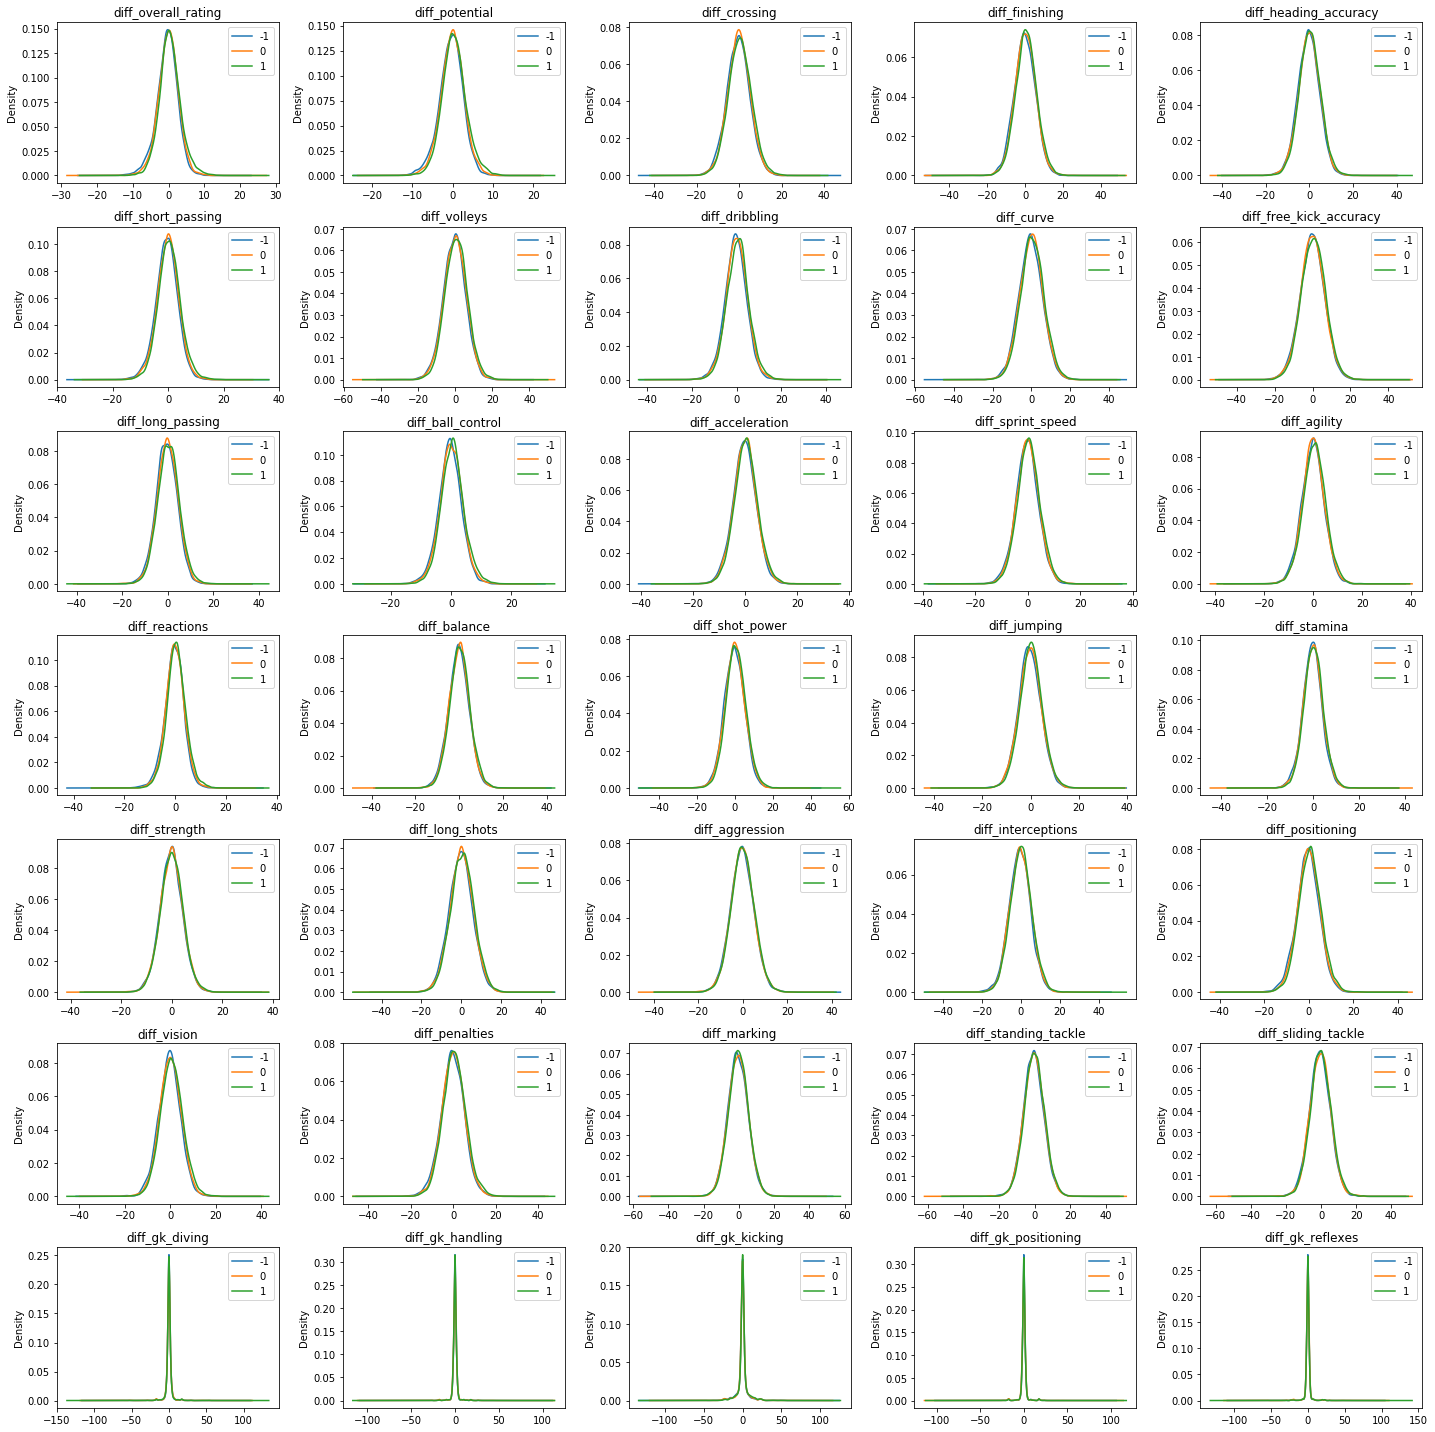

In [12]:
fig, axes = plt.subplots(7, 5, figsize = (20, 20))
axes = axes.flatten()
for label, df in european_matches.groupby('home_win'):
    for i, col in enumerate(diff_cols):
        df[col].plot.kde(label=label, ax = axes[i])
        axes[i].set_title(col)
        axes[i].legend()
plt.tight_layout();

Wow! From looking at the plots the distributions of a difference in rating among the three outcome do not really seem that different. 

This might be an indication that using individual ratings and aggregating them might not be the way to go. Also, so far efforts to get the individual ratings for the actual World Cup data have been unsuccessful, so this may be a sign to find other set of features to predict the world cup. (Later we will see an attempt of using team statistics)

Let us also look at whether previous match results will be good predictors. 

In [13]:
past_wins_columns = []
for i in range(1, 6):
    european_matches['diff_wins_past_{}_games'.format(i)] = (european_matches['home_wins_past_{}_games'.format(i)] -\
                                                             european_matches['away_wins_past_{}_games'.format(i)])
    past_wins_columns.append('diff_wins_past_{}_games'.format(i))
    #games against each other
    past_wins_columns.append('wins_past_{}_games'.format(i))

len(past_wins_columns)

10

In [14]:
european_matches.groupby('home_win')[past_wins_columns].mean()

,diff_wins_past_1_games,wins_past_1_games,diff_wins_past_2_games,wins_past_2_games,diff_wins_past_3_games,wins_past_3_games,diff_wins_past_4_games,wins_past_4_games,diff_wins_past_5_games,wins_past_5_games
home_win,,,,,,,,,,
-1,-0.203977,0.240128,-0.171301,0.468993,-0.273776,0.672414,-0.301307,0.849833,-0.375834,1.000139
0,-0.145738,0.261383,-0.074366,0.517725,-0.161651,0.745392,-0.144635,0.936033,-0.160548,1.101780
1,-0.100192,0.288337,0.026666,0.585679,0.009617,0.851985,0.091974,1.077024,0.103689,1.271201


We see a similar pattern as before, where home team winning has the highest mean values and away team winning has the lowest mean values. This time the small magnitudes make sense however since we are only looking up to 5 games back. Let us also plot the distributions.

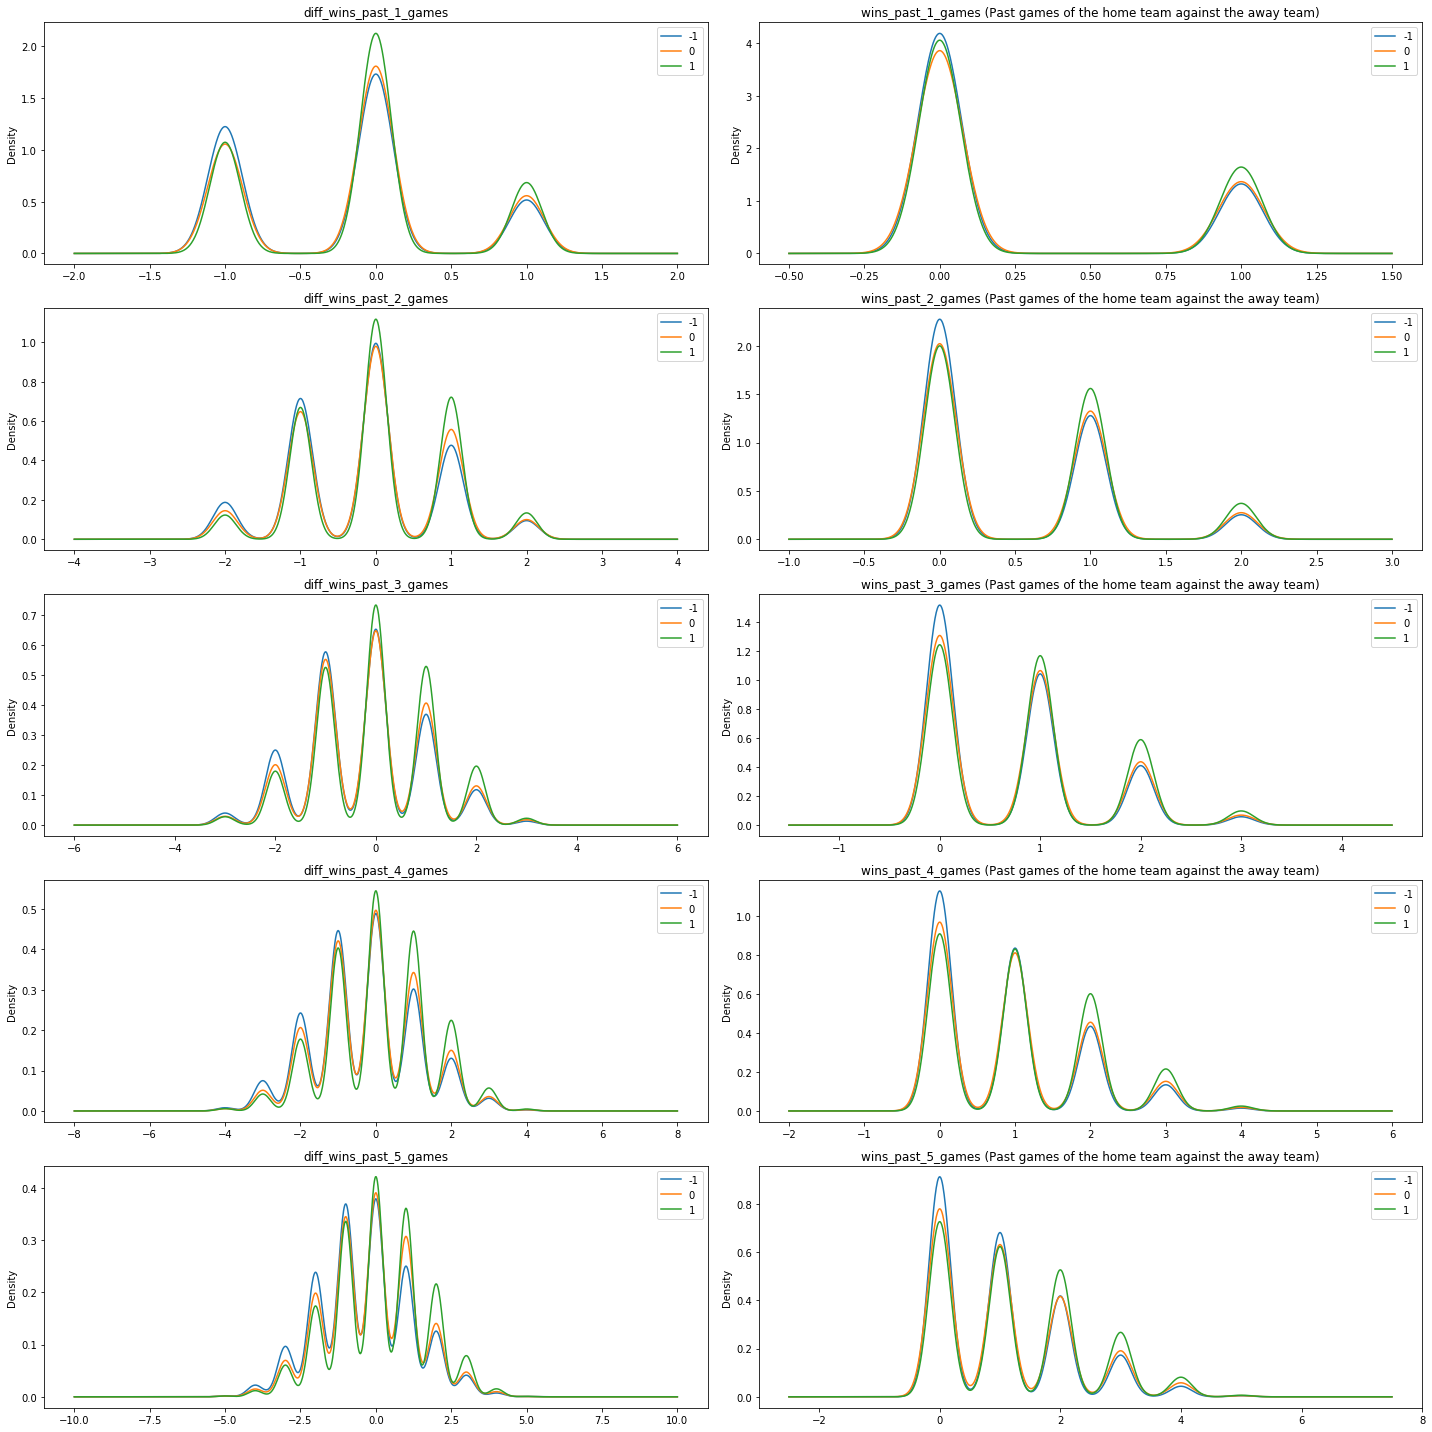

In [15]:
fig, axes = plt.subplots(5, 2, figsize = (20, 20))
axes = axes.flatten()
for label, df in european_matches.groupby('home_win'):
    for i, col in enumerate(past_wins_columns):
        df[col].plot.kde(label=label, ax = axes[i])
        #odd plots are the plots of the teams against each other
        if i % 2 == 1:
            axes[i].set_title(col + " (Past games of the home team against the away team)")
        else:
            axes[i].set_title(col)
        axes[i].legend()
plt.tight_layout();

This time it is a bit more obvious that home team winning tends to have higher values. It seems like we can probably calculate some kind of momentum and utilize it as a predictor. We will explore more of this concept later on when we make our advanced model.

## Conclusion

From exploration of the European dataset, we saw that aggregating individual player ratings does not seem to help that much while previous matches seem to help. We will keep these discoveries in mind as we move on to the SOFIFA datasets.